Mean Absolute Error: 0.01
Mean Squared Error: 0.00
R² Score: 1.00


C:\Users\legio\AppData\Local\Temp\ipykernel_11648\301646968.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Assists_Scaled', 'Completed Pass']] = scaler.fit_transform(X[['Assists_Scaled', 'Completed Pass']])


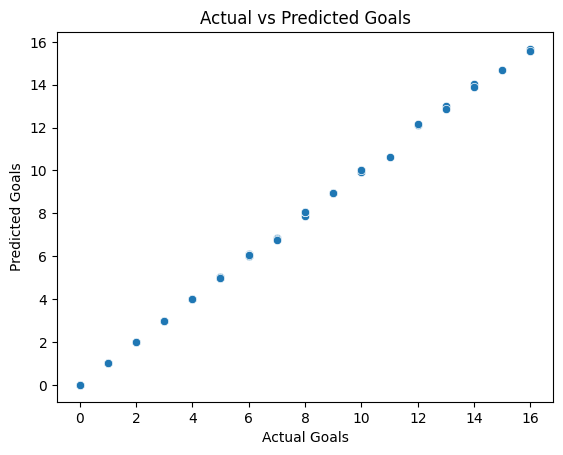

In [2]:
import pickle
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the trained model
with open('../models/best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the test data
data = pd.read_csv('../data/player_data/merged_player_data.csv')

# Feature Engineering: Create missing features
data['Assists_Scaled'] = data['ASSISTS'] / data['GAMES']  # Example scaling
data['Assists_Per_90'] = data['ASSISTS'] / (data['GAMES'] * 90)  # Assists per 90 minutes

# Define features and target variable for evaluation
X = data[['Assists_Scaled', 'Completed Pass', 'GOALS SCORED', 'Assists_Per_90']]  # Updated features
y = data['GOALS SCORED']  # Predict the exact number of goals scored

# Apply scaling on the data to avoid data leakage
scaler = StandardScaler()

# Fit the scaler on the entire dataset (if training during evaluation)
X[['Assists_Scaled', 'Completed Pass']] = scaler.fit_transform(X[['Assists_Scaled', 'Completed Pass']])

# Ensure the model has been trained before evaluating
if hasattr(model, 'predict'):
    # Make predictions with the model
    y_pred = model.predict(X)

    # Evaluation Metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # You can visualize predictions vs actual goals
    sns.scatterplot(x=y, y=y_pred)
    plt.xlabel("Actual Goals")
    plt.ylabel("Predicted Goals")
    plt.title("Actual vs Predicted Goals")
    plt.show()

else:
    print("Model is not fitted yet. Please train the model before evaluation.")
